# Data Exploration
---

## Data Cleaning and Merging 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import os
from scipy.stats import linregress
import numpy as np

In [40]:
df_existing = pd.read_csv("Resources/Data_cleaned.csv")
df_existing.head()

,FIPS,State,County,DIABETES_08(%),DIABETES_13(%),OBESE_12(%),OBESE_17(%),PHYSICALLY_ACT_17(%),GYMS_11,GYMS_16,...,FULL_SERVICE_RESTAURANTS_11,FULL_SERVICE_RESTAURANTS_16,FULL_SERVICE_RESTAURANTS_11_16(%),FULL_SERVICE_RESTAURANTS_POP_11,FULL_SERVICE_RESTAURANTS_POP_16,FULL_SERVICE_RESTAURANTS_POP_11_16(%),EXPENDITURES_PPC_FAST_FOOD_07,EXPENDITURES_PPC_FAST_FOOD_12,EXPENDITURES_PPC_RESTAURANTS_07,EXPENDITURES_PPC_RESTAURANTS_12
0,2016,AK,Aleutians West,5.9,6.2,25.7,34.2,18.4,0,0,...,2,4,100.000000,0.357974,0.696015,94.431878,582.71551,511.480788,688.084194,724.808882
1,2020,AK,Anchorage,7.0,7.0,25.7,34.2,18.4,35,44,...,222,247,11.261261,0.749263,0.830598,10.855316,582.71551,511.480788,688.084194,724.808882
2,2060,AK,Bristol Bay,6.8,8.5,25.7,34.2,18.4,0,0,...,2,2,0.000000,1.941748,2.209945,13.812155,582.71551,511.480788,688.084194,724.808882
3,2068,AK,Denali,6.0,5.8,25.7,34.2,18.4,0,0,...,8,6,-25.000000,4.278075,2.933985,-31.418093,582.71551,511.480788,688.084194,724.808882
4,2070,AK,Dillingham,7.8,7.2,25.7,34.2,18.4,0,0,...,3,2,-33.333333,0.606306,0.401929,-33.708467,582.71551,511.480788,688.084194,724.808882


In [41]:
df_counties = pd.read_csv('Resources/uscounties.csv')
df_counties.head()

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
0,Los Angeles,Los Angeles,Los Angeles County,6037,CA,California,34.3219,-118.2247,9936690
1,Cook,Cook,Cook County,17031,IL,Illinois,41.8401,-87.8168,5225367
2,Harris,Harris,Harris County,48201,TX,Texas,29.8578,-95.3938,4726177
3,Maricopa,Maricopa,Maricopa County,4013,AZ,Arizona,33.3490,-112.4915,4430871
4,San Diego,San Diego,San Diego County,6073,CA,California,33.0343,-116.7350,3289701


In [42]:
# Merge on county and state
df_merged = pd.merge(df_existing, df_counties, how='left',
                     left_on=['County', 'State'],
                     right_on=['county', 'state_id'])
df_merged

,FIPS,State,County,DIABETES_08(%),DIABETES_13(%),OBESE_12(%),OBESE_17(%),PHYSICALLY_ACT_17(%),GYMS_11,GYMS_16,...,EXPENDITURES_PPC_RESTAURANTS_12,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
0,2016,AK,Aleutians West,5.9,6.2,25.7,34.2,18.4,0,0,...,724.808882,Aleutians West,Aleutians West,Aleutians West Census Area,2016.0,AK,Alaska,52.7985,-106.5633,5219.0
1,2020,AK,Anchorage,7.0,7.0,25.7,34.2,18.4,35,44,...,724.808882,Anchorage,Anchorage,Anchorage Municipality,2020.0,AK,Alaska,61.1498,-149.1082,290674.0
2,2060,AK,Bristol Bay,6.8,8.5,25.7,34.2,18.4,0,0,...,724.808882,Bristol Bay,Bristol Bay,Bristol Bay Borough,2060.0,AK,Alaska,58.7439,-156.7000,854.0
3,2068,AK,Denali,6.0,5.8,25.7,34.2,18.4,0,0,...,724.808882,Denali,Denali,Denali Borough,2068.0,AK,Alaska,63.6714,-150.0118,2101.0
4,2070,AK,Dillingham,7.8,7.2,25.7,34.2,18.4,0,0,...,724.808882,Dillingham,Dillingham,Dillingham Census Area,2070.0,AK,Alaska,59.8003,-158.2346,4854.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,55133,WI,Waukesha,7.2,7.9,29.7,32.0,24.7,58,75,...,589.648556,Waukesha,Waukesha,Waukesha County,55133.0,WI,Wisconsin,43.0182,-88.3045,407290.0
2221,55135,WI,Waupaca,8.3,9.9,29.7,32.0,24.7,4,7,...,589.648556,Waupaca,Waupaca,Waupaca County,55135.0,WI,Wisconsin,44.4705,-88.9648,51822.0
2222,55137,WI,Waushara,8.6,10.6,29.7,32.0,24.7,3,1,...,589.648556,Waushara,Waushara,Waushara County,55137.0,WI,Wisconsin,44.1131,-89.2429,24672.0
2223,55139,WI,Winnebago,7.6,8.6,29.7,32.0,24.7,12,18,...,589.648556,Winnebago,Winnebago,Winnebago County,55139.0,WI,Wisconsin,44.0689,-88.6446,171197.0


In [43]:
# Check for missing values in the merged dataset
missing_values = df_merged.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Focus on critical columns like latitude and longitude
missing_lat_lon = df_merged[df_merged['lat'].isnull() | df_merged['lng'].isnull()]
print(f"Number of rows with missing coordinates: {len(missing_lat_lon)}")

Missing values per column:
FIPS                                      0
State                                     0
County                                    0
DIABETES_08(%)                            0
DIABETES_13(%)                            0
OBESE_12(%)                               0
OBESE_17(%)                               0
PHYSICALLY_ACT_17(%)                      0
GYMS_11                                   0
GYMS_16                                   0
GYMS_11_16_(%)                            0
GYMS_POP_11                               0
GYMS_POP_16                               0
GYMS_POP_11_16(%)                         0
WHITEPPL_10(%)                            0
BLACKPPL_10(%)                            0
HISPPPL_10(%)                             0
ASIANPPL_10(%)                            0
AMERI_INDPPL_10(%)                        0
HAWAIIANPPL_10(%)                         0
OVER65_PPL_10(%)                          0
UNDER18_PPL_10(%)                         0
MEDIA

In [44]:
# Display rows with missing latitude or longitude
print("Rows with missing latitude or longitude:")
print(missing_lat_lon[['County', 'State']])

Rows with missing latitude or longitude:
             County State
17   Valdez-Cordova    AK
220       Fairfield    CT
221        Hartford    CT
222      Litchfield    CT
223       Middlesex    CT
224       New Haven    CT
225      New London    CT
226         Tolland    CT
227         Windham    CT
748        La Salle    LA


In [45]:
# Manually adding coordinates for known missing counties
manual_coords = {
    'Valdez-Cordova': (61.1333, -146.3515),
    'Fairfield': (41.1792, -73.1894),
    'Hartford': (41.7658, -72.6734),
    'Litchfield': (41.7473, -73.1899),
    'Middlesex': (41.4595, -72.5395),
    'New Haven': (41.3083, -72.9279),
    'New London': (41.3556, -72.0995),
    'Tolland': (41.9057, -72.3437),
    'Windham': (41.8285, -71.9731),
    'La Salle': (31.7278, -92.1198)
}

# Add coordinates to the missing rows
for county, coords in manual_coords.items():
    df_merged.loc[df_merged['County'].str.contains(county, case=False, na=False), ['lat', 'lng']] = coords


In [46]:
# RE-CHECK MISSING VALUES
missing_lat_lon = df_merged[df_merged['lat'].isnull() | df_merged['lng'].isnull()]
print(f"Number of rows with missing coordinates: {len(missing_lat_lon)}")
# Display rows with missing latitude or longitude
print("Rows with missing latitude or longitude:")
print(missing_lat_lon[['County', 'State']])

Number of rows with missing coordinates: 0
Rows with missing latitude or longitude:
Empty DataFrame
Columns: [County, State]
Index: []


In [47]:
#Display all the column names of the dataframe
df_merged.columns


Index(['FIPS', 'State', 'County', 'DIABETES_08(%)', 'DIABETES_13(%)',
       'OBESE_12(%)', 'OBESE_17(%)', 'PHYSICALLY_ACT_17(%)', 'GYMS_11',
       'GYMS_16', 'GYMS_11_16_(%)', 'GYMS_POP_11', 'GYMS_POP_16',
       'GYMS_POP_11_16(%)', 'WHITEPPL_10(%)', 'BLACKPPL_10(%)',
       'HISPPPL_10(%)', 'ASIANPPL_10(%)', 'AMERI_INDPPL_10(%)',
       'HAWAIIANPPL_10(%)', 'OVER65_PPL_10(%)', 'UNDER18_PPL_10(%)',
       'MEDIAN_HOUSEHOLD_INCOME_15', 'POVERTY_RATE_15(%)',
       'PERSISTENT_POVERTY_COUNTIES_10', 'CHILD_POVERTY_RATE_15(%)',
       'PERSISTENT_CHILD_POVERTY_COUNTIES_10', 'METROPOLITAN_COUNTIES_13',
       'POPULATION_LOSS_COUNTIES_10', 'FAST_FOOD_RESTAURANTS_11',
       'FAST_FOOD_RESTAURANTS_16', 'FAST_FOOD_RESTAURANTS_11_16(%)',
       'FAST_FOOD_RESTAURANT_POP_11', 'FAST_FOOD_RESTAURANT_POP_16',
       'PCH_FFRPTH_11_16', 'FULL_SERVICE_RESTAURANTS_11',
       'FULL_SERVICE_RESTAURANTS_16', 'FULL_SERVICE_RESTAURANTS_11_16(%)',
       'FULL_SERVICE_RESTAURANTS_POP_11', 'FULL_SERVICE

In [48]:
# Adjust the column names based on your dataset
columns_needed = ['State',
                  'County',
                  'lat',
                  'lng',
                  'METROPOLITAN_COUNTIES_13',
                  'POPULATION_LOSS_COUNTIES_10', 
                  'DIABETES_13(%)',
                  'OBESE_17(%)',
                  'FAST_FOOD_RESTAURANT_POP_11',
                  'FAST_FOOD_RESTAURANT_POP_16']  
# Create a new DataFrame with the selected columns
df_analysis = df_merged[columns_needed]

# Display the first few rows of the DataFrame
df_analysis.head()


,State,County,lat,lng,METROPOLITAN_COUNTIES_13,POPULATION_LOSS_COUNTIES_10,DIABETES_13(%),OBESE_17(%),FAST_FOOD_RESTAURANT_POP_11,FAST_FOOD_RESTAURANT_POP_16
0,AK,Aleutians West,52.7985,-106.5633,0,0.0,6.2,34.2,0.357974,0.000000
1,AK,Anchorage,61.1498,-149.1082,1,0.0,7.0,34.2,0.678387,0.699451
2,AK,Bristol Bay,58.7439,-156.7000,0,1.0,8.5,34.2,0.000000,0.000000
3,AK,Denali,63.6714,-150.0118,0,0.0,5.8,34.2,0.534759,1.466993
4,AK,Dillingham,59.8003,-158.2346,0,0.0,7.2,34.2,0.202102,0.200965


In [49]:
# Check data types and null values
print(df_analysis.info())

# Summary statistics
print(df_analysis.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        2225 non-null   object 
 1   County                       2225 non-null   object 
 2   lat                          2225 non-null   float64
 3   lng                          2225 non-null   float64
 4   METROPOLITAN_COUNTIES_13     2225 non-null   int64  
 5   POPULATION_LOSS_COUNTIES_10  2225 non-null   float64
 6   DIABETES_13(%)               2225 non-null   float64
 7   OBESE_17(%)                  2225 non-null   float64
 8   FAST_FOOD_RESTAURANT_POP_11  2225 non-null   float64
 9   FAST_FOOD_RESTAURANT_POP_16  2225 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 174.0+ KB
None
               lat          lng  METROPOLITAN_COUNTIES_13  \
count  2225.000000  2225.000000               2225.000000   
mean  

# How does the rate of obesity and diabetes compare in population loss counties versus metropolitan counties?

In [50]:
# Filter for Metropolitan Counties
metropolitan = df_analysis[df_analysis['METROPOLITAN_COUNTIES_13'] == 1]

# Filter for Population Loss Counties
population_loss = df_analysis[df_analysis['POPULATION_LOSS_COUNTIES_10'] == 1]

# Display counts to ensure correct filtering
print(f"Number of Metropolitan Counties: {len(metropolitan)}")
print(f"Number of Population Loss Counties: {len(population_loss)}")


Number of Metropolitan Counties: 851
Number of Population Loss Counties: 378


In [51]:
# Calculate mean and median for Metropolitan Counties
metropolitan_stats = metropolitan[['DIABETES_13(%)', 'OBESE_17(%)']].agg(['mean', 'median'])

# Calculate mean and median for Population Loss Counties
population_loss_stats = population_loss[['DIABETES_13(%)', 'OBESE_17(%)']].agg(['mean', 'median'])

print("Metropolitan Counties Statistics:\n", metropolitan_stats)
print("\nPopulation Loss Counties Statistics:\n", population_loss_stats)



Metropolitan Counties Statistics:
         DIABETES_13(%)  OBESE_17(%)
mean          10.56651    31.284136
median        10.50000    32.100000

Population Loss Counties Statistics:
         DIABETES_13(%)  OBESE_17(%)
mean         11.376984     32.80291
median       11.100000     32.80000


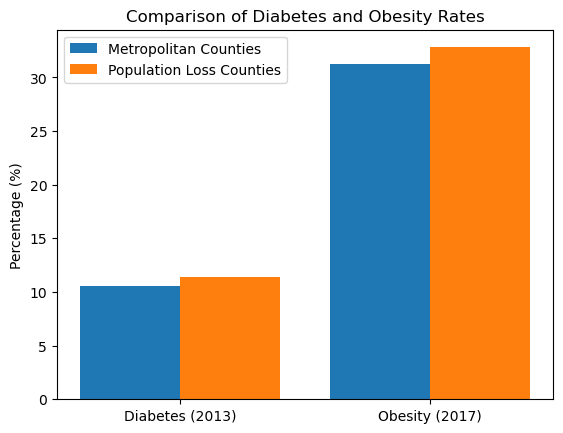

In [52]:
# Data for visualization
categories = ['Diabetes (2013)', 'Obesity (2017)']
metropolitan_means = metropolitan[['DIABETES_13(%)', 'OBESE_17(%)']].mean()
population_loss_means = population_loss[['DIABETES_13(%)', 'OBESE_17(%)']].mean()

# Create bar chart
x = range(len(categories))
plt.bar(x, metropolitan_means, width=0.4, label='Metropolitan Counties', align='center')
plt.bar([p + 0.4 for p in x], population_loss_means, width=0.4, label='Population Loss Counties', align='center')
plt.xticks([p + 0.2 for p in x], categories)
plt.ylabel('Percentage (%)')
plt.title('Comparison of Diabetes and Obesity Rates')
plt.legend()

# Save the figure
plt.savefig("Carlos_Visualizations/Comparison_Diabetes_Obesity_Rates_Metro_PopLoss.png")

plt.show()



### **Insights from the Statistics**

#### **Diabetes and Obesity Are Higher in Population Loss Counties**
- Both diabetes and obesity rates are **higher in population loss counties** than in metropolitan counties.
- This reinforces the observation that rural areas face unique health challenges compared to urban regions.

#### **Slightly Higher Variability in Diabetes Rates for Population Loss Counties**
- The gap between the mean and median for diabetes in population loss counties suggests a slightly broader range of diabetes rates.
- This may indicate the presence of counties with exceptionally high or low diabetes rates in rural areas.

#### **Rural Health Challenges**
- The higher diabetes and obesity rates in population loss counties likely reflect systemic differences between rural and urban areas:
  - **Healthcare Access**: Rural areas may face limited access to healthcare facilities, delaying diabetes diagnosis or management.
  - **Lifestyle Factors**: Challenges such as higher poverty rates, food deserts, and lower physical activity infrastructure could contribute to higher obesity and diabetes rates.
  - **Education and Awareness**: Awareness about healthy habits and early disease detection may be lower in rural areas, exacerbating health issues.


# Regional Patterns of Obesity and Diabetes Across the United States

In [53]:
# Obesity Map
obesity_plot = df_analysis.hvplot.points(
    'lng', 'lat', 
    geo=True, 
    color='OBESE_17(%)', 
    cmap='Viridis', 
    size=10, 
    hover_cols=['OBESE_17(%)', 'County', 'State'], 
    tiles='OSM', 
    title='Obesity Rates(%) by County (2017)'
)

In [54]:
# Diabetes Map
diabetes_plot = df_analysis.hvplot.points(
    'lng', 'lat', 
    geo=True, 
    color='DIABETES_13(%)', 
    cmap='Plasma',  # Different color map for distinction
    size=10, 
    hover_cols=['DIABETES_13(%)', 'County', 'State'], 
    tiles='OSM', 
    title='Diabetes Rates(%) by County (2013)'
)

In [55]:
# Side-by-side plots
combined_plot = obesity_plot + diabetes_plot
combined_plot


:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lng,lat]   (OBESE_17(%),County,State)
   .Overlay.II :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lng,lat]   (DIABETES_13(%),County,State)

In [56]:
# Save the HTML file
hvplot.save(combined_plot, 'Carlos_Visualizations/combined_obesity_diabetes_map.html')

### **Insights from the Regional Comparison**

---

### **Obesity Rates (2017)**

#### **High Obesity Regions:**
- The **Southeastern U.S.** shows the highest obesity rates (green areas).
  - States like Mississippi, Alabama, Arkansas, and Louisiana have counties with obesity rates exceeding 35%.
- Parts of the **Midwest** (e.g., Missouri, Kentucky) also exhibit high obesity rates.

#### **Low Obesity Regions:**
- **Western states** such as Colorado, Utah, and California have lower obesity rates (purple areas), often below 26%.
- The **Northeastern U.S.**, including states like Vermont and Massachusetts, also has comparatively lower obesity rates.

#### **Regional Clusters:**
- Clusters of high obesity counties are concentrated in the Southeast, while the West and Northeast are more evenly distributed with lower rates.

---

### **Diabetes Rates (2013)**

#### **High Diabetes Regions:**
- The **Southeastern U.S.** again stands out with the highest diabetes rates (yellow and orange areas).
  - States like Alabama, Mississippi, and West Virginia show significant overlaps between high obesity and high diabetes rates.
- Some areas in the **Midwest** also show elevated diabetes rates.

#### **Low Diabetes Regions:**
- **Western states** (e.g., Colorado, Utah) exhibit the lowest diabetes rates (purple areas), aligning with their lower obesity rates.
- Similarly, parts of the **Northeast** (e.g., Vermont, New Hampshire) show relatively low diabetes prevalence.

#### **Spread of Rates:**
- Diabetes rates appear to have a slightly broader geographic spread compared to obesity, possibly due to additional factors like poverty, access to healthcare, or demographics.

---

### **Correlations Between Obesity and Diabetes**

#### **Strong Overlap:**
- Counties with high obesity rates often correspond to high diabetes rates, particularly in the Southeast and parts of the Midwest.
- This geographic overlap aligns with the understanding that obesity is a key risk factor for diabetes.

#### **Outliers:**
- Some counties show moderate obesity rates but relatively high diabetes rates (e.g., certain Midwest regions). These may reflect other contributing factors, such as healthcare access, genetic predisposition, or economic conditions.

#### **Regional Disparities:**
- The **Western U.S.** and **Northeast** generally fare better in both obesity and diabetes rates, likely due to:
  - Better access to healthy food and physical activity.
  - Higher socioeconomic conditions.
- The **Southeastern U.S.** faces a significant public health challenge, as evidenced by its clustering of high rates in both maps.


# Linear Regression
---

## Is there a significant correlation between obesity and diabetes rates in population loss counties compared to metropolitan counties?

### **Hypotheses for Metropolitan Counties**

- **Null Hypothesis (H₀):**
  There is no statistically significant relationship between obesity rates (2017) and diabetes rates (2013) in metropolitan counties.

- **Alternative Hypothesis (H₁):**
  There is a statistically significant positive relationship between obesity rates (2017) and diabetes rates (2013) in metropolitan counties.

---

### **Hypotheses for Population Loss Counties**

- **Null Hypothesis (H₀):**
  There is no statistically significant relationship between obesity rates (2017) and diabetes rates (2013) in population loss counties.

- **Alternative Hypothesis (H₁):**
  There is a statistically significant positive relationship between obesity rates (2017) and diabetes rates (2013) in population loss counties.


In [58]:

# Separate data for Metropolitan and Population Loss counties
metropolitan = df_analysis[df_analysis['METROPOLITAN_COUNTIES_13'] == 1]
population_loss = df_analysis[df_analysis['POPULATION_LOSS_COUNTIES_10'] == 1]

# Extract data for Metropolitan Counties
X_metro = metropolitan['OBESE_17(%)'].values  # Predictor: Obesity rate
y_metro = metropolitan['DIABETES_13(%)'].values  # Target: Diabetes rate

# Perform linear regression for Metropolitan Counties
slope_metro, intercept_metro, r_value_metro, p_value_metro, std_err_metro = linregress(X_metro, y_metro)

# Extract data for Population Loss Counties
X_poploss = population_loss['OBESE_17(%)'].values  # Predictor: Obesity rate
y_poploss = population_loss['DIABETES_13(%)'].values  # Target: Diabetes rate

# Perform linear regression for Population Loss Counties
slope_poploss, intercept_poploss, r_value_poploss, p_value_poploss, std_err_poploss = linregress(X_poploss, y_poploss)

# Display results for Metropolitan Counties
print("Metropolitan Counties Regression:")
print(f"Slope: {slope_metro:.4f}")
print(f"Intercept: {intercept_metro:.4f}")
print(f"R² Score: {r_value_metro**2:.4f}")
print(f"P-value: {p_value_metro:.4f}")
print(f"Standard Error: {std_err_metro:.4f}")

# Display results for Population Loss Counties
print("\nPopulation Loss Counties Regression:")
print(f"Slope: {slope_poploss:.4f}")
print(f"Intercept: {intercept_poploss:.4f}")
print(f"R² Score: {r_value_poploss**2:.4f}")
print(f"P-value: {p_value_poploss:.4f}")
print(f"Standard Error: {std_err_poploss:.4f}")


Metropolitan Counties Regression:
Slope: 0.3141
Intercept: 0.7394
R² Score: 0.2255
P-value: 0.0000
Standard Error: 0.0200

Population Loss Counties Regression:
Slope: 0.2626
Intercept: 2.7629
R² Score: 0.1772
P-value: 0.0000
Standard Error: 0.0292


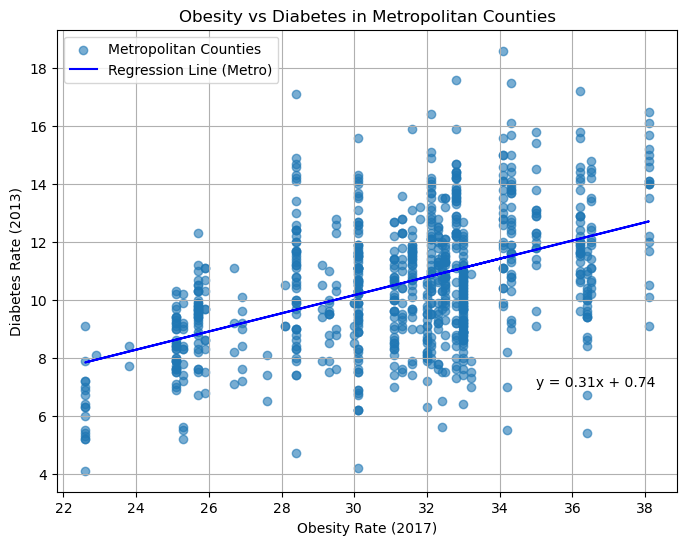

In [60]:
# Data for Metropolitan Counties
X_metro = metropolitan['OBESE_17(%)'].values  # Predictor: Obesity rate
y_metro = metropolitan['DIABETES_13(%)'].values  # Target: Diabetes rate

# Perform linear regression with scipy.stats
slope_metro, intercept_metro, r_value_metro, p_value_metro, std_err_metro = linregress(X_metro, y_metro)

# Plot for Metropolitan Counties
plt.figure(figsize=(8, 6))
plt.scatter(X_metro, y_metro, alpha=0.6, label='Metropolitan Counties')
plt.plot(X_metro, slope_metro * X_metro + intercept_metro, color='blue', label='Regression Line (Metro)')

# Add regression formula as text on the right side
plt.text(35, 7, f'y = {slope_metro:.2f}x + {intercept_metro:.2f}', fontsize=10, color='black')

# Add titles and labels
plt.title('Obesity vs Diabetes in Metropolitan Counties')
plt.xlabel('Obesity Rate (2017)')
plt.ylabel('Diabetes Rate (2013)')
plt.legend()
plt.grid(True)
plt.savefig("Carlos_Visualizations/Obesity_vs Diabetes_METRO.png")
plt.show()

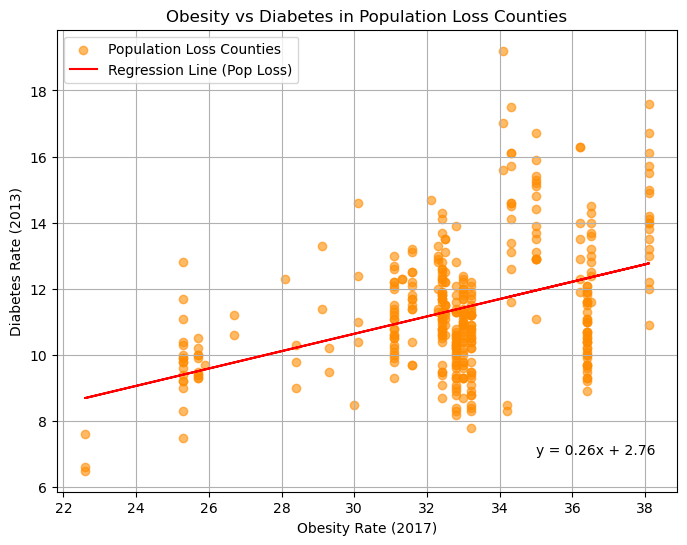

In [61]:
# Data for Population Loss Counties
X_poploss = population_loss['OBESE_17(%)'].values  # Predictor: Obesity rate
y_poploss = population_loss['DIABETES_13(%)'].values  # Target: Diabetes rate

# Perform linear regression with scipy.stats
slope_poploss, intercept_poploss, r_value_poploss, p_value_poploss, std_err_poploss = linregress(X_poploss, y_poploss)

# Plot for Population Loss Counties
plt.figure(figsize=(8, 6))
plt.scatter(X_poploss, y_poploss, alpha=0.6, color='darkorange', label='Population Loss Counties')
plt.plot(X_poploss, slope_poploss * X_poploss + intercept_poploss, color='red', label='Regression Line (Pop Loss)')

# Add regression formula as text on the right side
plt.text(35, 7, f'y = {slope_poploss:.2f}x + {intercept_poploss:.2f}', fontsize=10, color='black')

# Add titles and labels
plt.title('Obesity vs Diabetes in Population Loss Counties')
plt.xlabel('Obesity Rate (2017)')
plt.ylabel('Diabetes Rate (2013)')
plt.legend()
plt.grid(True)
plt.savefig("Carlos_Visualizations/Obesity_vs Diabetes_POPLOSS.png")
plt.show()

**Predict Diabetes Rates for Specific Obesity Rates**

In [62]:
# Example obesity rates to predict
new_obesity_rates = np.array([25, 30, 35]).reshape(-1, 1)

# Predictions for Metropolitan Counties
predicted_diabetes_metro = reg_metro.predict(new_obesity_rates)
print("Predictions for Metropolitan Counties:")
for obesity, diabetes in zip(new_obesity_rates.flatten(), predicted_diabetes_metro):
    print(f"Obesity: {obesity}%, Predicted Diabetes: {diabetes:.2f}%")

# Predictions for Population Loss Counties
predicted_diabetes_poploss = reg_poploss.predict(new_obesity_rates)
print("\nPredictions for Population Loss Counties:")
for obesity, diabetes in zip(new_obesity_rates.flatten(), predicted_diabetes_poploss):
    print(f"Obesity: {obesity}%, Predicted Diabetes: {diabetes:.2f}%")

Predictions for Metropolitan Counties:
Obesity: 25%, Predicted Diabetes: 8.59%
Obesity: 30%, Predicted Diabetes: 10.16%
Obesity: 35%, Predicted Diabetes: 11.73%

Predictions for Population Loss Counties:
Obesity: 25%, Predicted Diabetes: 9.33%
Obesity: 30%, Predicted Diabetes: 10.64%
Obesity: 35%, Predicted Diabetes: 11.95%
